In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = pd.Categorical.from_codes(y, iris.target_names)

print(pca.explained_variance_ratio_[0]*100)
print(pca.explained_variance_ratio_[1]*100)

72.96244541329992
22.850761786701746


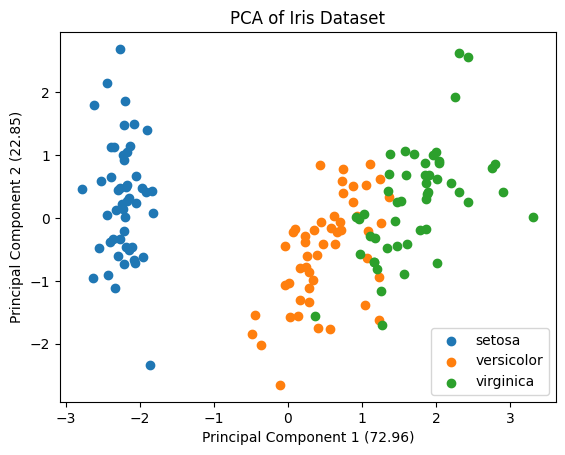

In [ ]:
for i in iris.target_names:
    subset = df_pca[df_pca['species'] == i]
    plt.scatter(subset['PC1'], subset['PC2'], label=i)

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f})')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f})')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

In [ ]:
df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
df_lda['species'] = pd.Categorical.from_codes(y, iris.target_names)

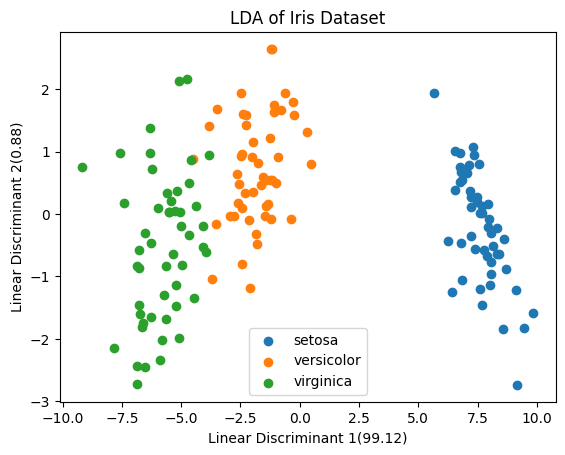

In [ ]:
for i in iris.target_names:
    subset = df_lda[df_lda['species'] == i]
    plt.scatter(subset['LD1'], subset['LD2'], label=i)

plt.xlabel(f'Linear Discriminant 1({lda.explained_variance_ratio_[0]*100:.2f})')
plt.ylabel(f'Linear Discriminant 2({lda.explained_variance_ratio_[1]*100:.2f})')
plt.title('LDA of Iris Dataset')
plt.legend()
plt.show()